# Datasets and Dataloaders

Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code
to be decoupled from our model training code for better readability and modularity.
PyTorch provides two data primitives: ``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``
that allow you to use pre-loaded datasets as well as your own data.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset`` to enable easy access to the samples.

PyTorch domain libraries provide a number of sample pre-loaded datasets (such as FashionMNIST) that subclass ``torch.utils.data.Dataset`` and implement functions specific to the particular data. They can be found and used as samples for prototyping and benchmarking your model here: 
- Image Datasets
- Text Datasets
- Audio Datasets

## Loading a dataset

We will be loading the **_Fashion-MNIST_** dataset from TorchVision.  Fashion-MNIST is a dataset of Zalando’s article images consisting of of 60,000 training examples and 10,000 test examples.  Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.  

 - Each image is 28 pixels in height and 28 pixels in width, with a total of 784 pixels
 - The 10 classes tell what type of image it is. For example: T-shirt/top, Trouser, Pullover, Dress, Bag, Ankle boot etc.
 - The grayscale are values between 0 to 255 that measure the intensity of black and white images.  The intensity value increase from white to black. For example:  a white color will be 0, while a black color will 255.
 
 ![Image show grayscale image pixels and values](images/3-data-1.png)


We load the FashionMNIST Dataset with the following parameters:
 - **root** is the path where the train/test data is stored,
 - **train** specifies training or test dataset,
 - **download=True** downloads the data from the Internet if it's not available at `root`.
 - **transform** and `target_transform` specify the feature and label transformations

In [1]:
%matplotlib inline
import torch

'''
The Dataset class is the class where we store the data and their labels.
For example: we can store images and their classes, or images and their bounding boxes.
We can also stores signal or texts and their attributes.
We can load readly available data from torchvision or load our own dataset.
'''
from torch.utils.data import Dataset 

from torchvision import datasets #This class contains readly available dataset
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

type(training_data)

torchvision.datasets.mnist.FashionMNIST

In [4]:
#Let have a closer look at the training data construct
training_data.__dict__
#training_data.__dict__['data']
#training_data.__dict__['data'][0]
#training_data.__dict__['targets']
#plt.imshow(training_data.__dict__['data'][0].squeeze())

{'root': 'data',
 'transform': ToTensor(),
 'target_transform': None,
 'transforms': StandardTransform
 Transform: ToTensor(),
 'train': True,
 'data': tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         ...,
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
        

In [5]:
img, label = training_data[0] #The first element in the dataset. Notice that it returns 2 items: the data itself and the label
print(img.size())
print(label)
#To plot the image with plt.imshow, the image the shape should be either [#lines, #cols] or [#lines, #cols, 3]
#But, our Tensor has a size [1, 28, 28]. It should be squeezed (Returns a tensor with all the dimensions of input of size 1 removed)

torch.Size([1, 28, 28])
9


In [18]:
img.squeeze().size()

torch.Size([28, 28])

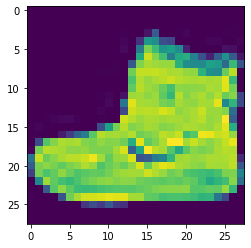

In [7]:
plt.imshow(img.squeeze()) #squeeze will remove the non-used dimension

## Iterating and Visualizing the Dataset
-----------------

We can index ``Datasets`` manually like a list: ``training_data[index]``. 
We use ``matplotlib`` to visualize some samples in our training data.

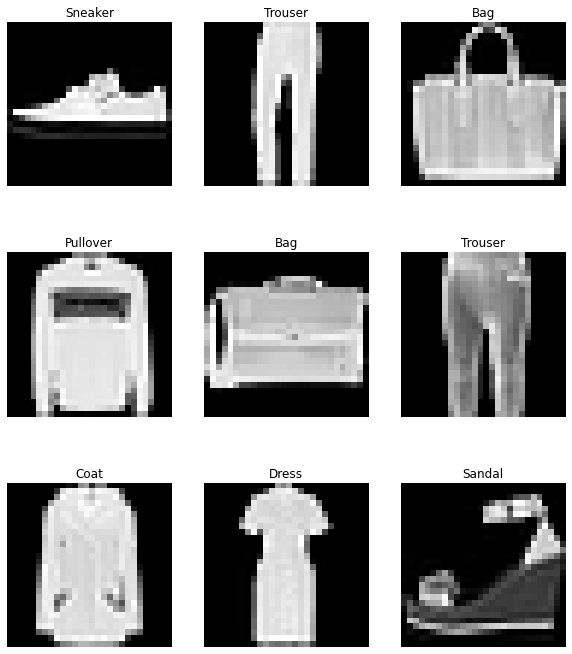

In [8]:
labels_map = { #https://www.kaggle.com/datasets/zalando-research/fashionmnist
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(10, 12))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() #Choosing a random index
    img, label = training_data[sample_idx] #Retreiving the img and label from the dataset
    figure.add_subplot(rows, cols, i) #Adding a subplot
    plt.title(labels_map[label]) #Adding a title to the subplot
    plt.axis("off") #we don't need axis, because these are images
    plt.imshow(img.squeeze(), cmap="gray") #show the image on the subplot placeholder
plt.show()

## Preparing your data for training with DataLoaders
-------------------------------------------------
The ``Dataset`` retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to 
pass samples in **"minibatches"**, **"reshuffle"** the data at every epoch to **reduce model overfitting**, and use Python's **multiprocessing** to
speed up data retrieval.

In machine learning, you need to specify what the feature and label are in your dataset. **Features** are input and **labels** are output.  We train use features and train the model to predict the label.

  - Labels are what 10 class types:  T-shirt, Sandal, Dress etc
  - Features are the patterns in the images pixels

The ``DataLoader`` is an iterable that abstracts this complexity for us in an easy API.  We use the Dataloader, we need to set the following paraments:
 - **data** the training data that will be used to train the model; and test data to evaluate the model
 - **batch size** the number of records to be processed in each batch
 - **shuffle** the randoms sample of the data by indices


In [9]:
from torch.utils.data import DataLoader #This class allows us to make iterations over the dataset item (we say: it wraps an iterable around the dataset)

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## Iterate through the DataLoader

We have loaded that dataset into the `Dataloader` and can iterate through the dataset as needed.
Each iteration below returns a batch of `train_features` and `train_labels`(containing `batch_size=64` features and labels respectively). Because we specified `shuffle=True`, after we iterate over all batches the data is shuffled (for finer-grained control over  the data loading order.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


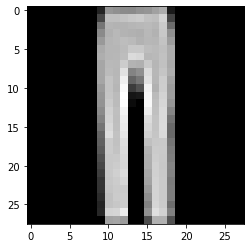

Label: 1


In [38]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader)) #next will get the next data/label item from the data set
print(f"Feature batch shape: {train_features.size()}") #Notice that the train_features and labels comes each 64 together (because of the batch size)
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Normalization (as in all statistical or machine learning data transformations)

Normalization is a common data pre-processing technique that is applied to scale or transform the data to make sure there's an equal learning contribution from each feature.  For example, each pixel in the grayscale images have a value between 0 and 255, which are features.   If one pixel value is 17 and another pixel is 197. There will be an uneven distribution of the pixel importance, because the higher pixel volumes will deviate the learning. Normalization changes the range of your data, without distorting its distintion among out feature.  This pre-processing is to avoid:

- A reduction of the prediction accuracy 
- Difficulty for the model to learn
- Unfavorable distribution of the feature data ranges

## Transforms

Data does not always come in its final processed form that is required for 
training machine learning algorithms. We use **transforms** to perform some
manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters (`transform` to modify the features and
`target_transform` to modify the labels) that accept callables containing the transformation logic. The `torchvision.transforms` module offers 
several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are integers.
For training, we need the **features** (images) as normalized tensors, and the labels as one-hot encoded tensors.
To make these transformations, we use `ToTensor` and `Lambda`.

One Hot Encoding:
![One hot encoding](images/3-data-2.png)


In [14]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(), #convert all images to Tensors and normalize them between 0 and 1
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)) #For the labels
)

## ToTensor()

`ToTensor` converts a PIL image or NumPy `ndarray` into a `FloatTensor` and scales the image's pixel intensity values in the range \[0., 1.\]

 ![Image show grayscale image pixels and values](images/3-data-1.png)


## Lambda transforms

Lambda transforms apply any user-defined lambda function. Here, we define a function 
to turn the integer into a one-hot encoded tensor. 
It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls scatter which assigns a 
_value=1_ on the index as given by the label _y_. You can also use `torch.nn.functional.one_hot` as another option to do that.

In [11]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

In [15]:
img, label = ds[0]

In [ ]:
img

In [13]:
label

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])